## Limpieza y Normalización de Datos - Precios de Aguacate

In [48]:
# Importar librerías
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
print(plt.style.available)


plt.style.use('seaborn-v0_8')

# Cargar datos
avocado = pd.read_csv('../data/avocado.csv')


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


### 1. Manejo de valores nulos

Verificar valores nulos
**Si hubiera valores nulos (en este dataset no hay), aplicaríamos:** <br>
*(Aunque el dataset actual no contiene nulos, se establece el siguiente protocolo:)*

- **Numéricas:**
  - Imputación con mediana (robusta a outliers) o media.

- **Categóricas:**
  - Imputación con moda o "Desconocido"

In [49]:
# Verificar valores nulos en el dataset
null_counts = avocado.isnull().sum()
null_percentage = (avocado.isnull().mean() * 100).round(2)

pd.DataFrame({
    'Valores Nulos': null_counts,
    'Porcentaje (%)': null_percentage
}).sort_values(by='Porcentaje (%)', ascending=False)

,Valores Nulos,Porcentaje (%)
Unnamed: 0,0,0.0
Date,0,0.0
AveragePrice,0,0.0
Total Volume,0,0.0
4046,0,0.0
4225,0,0.0
4770,0,0.0
Total Bags,0,0.0
Small Bags,0,0.0
Large Bags,0,0.0


### Tratamiento de Valores Atípicos
Identificación con IQR

In [50]:
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]
outliers = detect_outliers(avocado, 'Total Volume')
print(f"Número de outliers en Total Volume: {len(outliers)}")


Número de outliers en Total Volume: 2297


### Estrategias de Tratamiento
**Justificación:** <br>
• Transformación logarítmica: Ideal para datos con escala exponencial (preserva el orden sin eliminar datos).  
• Winsorization: Útil cuando se necesitan valores originales pero acotados.

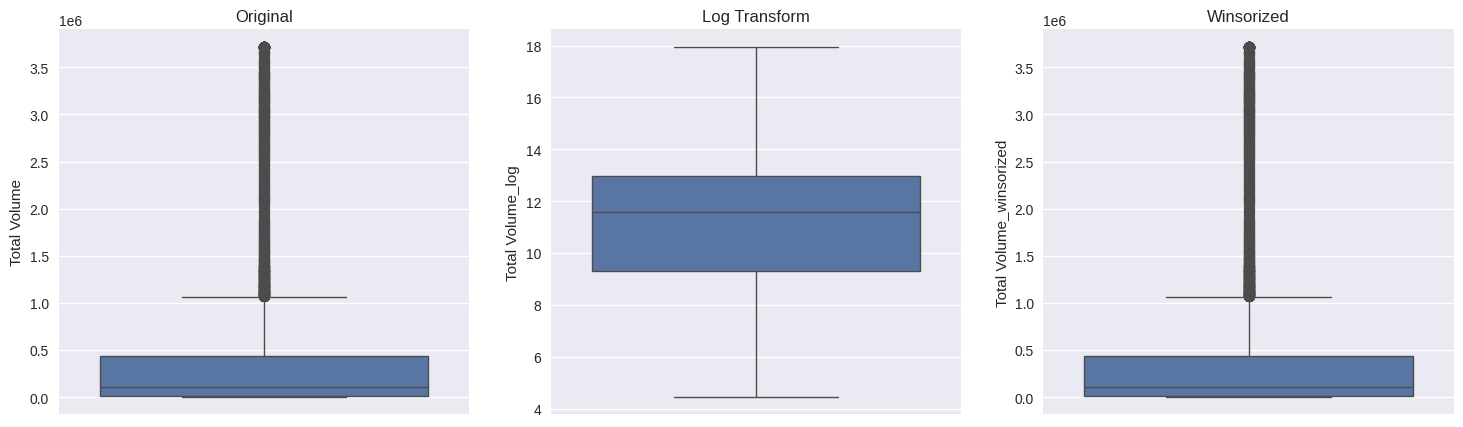

In [51]:
# Opción 1: Transformación logarítmica (recomendada para volúmenes)
avocado['Total Volume_log'] = np.log1p(avocado['Total Volume'])

# Opción 2: Winsorization (limitar extremos)
from scipy.stats.mstats import winsorize
avocado['Total Volume_winsorized'] = winsorize(avocado['Total Volume'], limits=[0.05, 0.05])

# Comparación visual
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.boxplot(y=avocado['Total Volume'], ax=axes[0]).set_title('Original')
sns.boxplot(y=avocado['Total Volume_log'], ax=axes[1]).set_title('Log Transform')
sns.boxplot(y=avocado['Total Volume_winsorized'], ax=axes[2]).set_title('Winsorized')
plt.show()

## 3. Transformación de variables categóricas
### Convertir tipo a dummy

In [52]:
avocado = pd.get_dummies(avocado, columns=['type'], drop_first=True)

### Convertir fecha a características numéricas

In [53]:
# Convertir fecha a características numéricas
avocado['Date'] = pd.to_datetime(avocado['Date'])
avocado['month'] = avocado['Date'].dt.month
avocado['day_of_week'] = avocado['Date'].dt.dayofweek
avocado.drop('Date', axis=1, inplace=True)

### Codificación one-hot para region (simplificada)

In [54]:
top_regions = avocado['region'].value_counts().nlargest(10).index
avocado['region'] = avocado['region'].apply(lambda x: x if x in top_regions else 'Other')
avocado = pd.get_dummies(avocado, columns=['region'], drop_first=True)

## Normalizacion


In [55]:
cols_to_scale = ['Total Volume', '4046', '4225', '4770', 
                'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']

scaler = StandardScaler()
avocado[cols_to_scale] = scaler.fit_transform(avocado[cols_to_scale])

## Guardar datos limpios

In [56]:
avocado.to_csv('../data/avocado_clean.csv', index=False)
print("Datos limpios guardados exitosamente!")

Datos limpios guardados exitosamente!
